# Business Problem

`Problem Definition:`
Lacak kalori seseorang yang dibakar melalui data setelah melakukan olahraga, variabel yang digunakan adalah _gender_, _age_, _height_, _weight_, _duration_, _heart rate_, dan _body temperature_!
Dari masalah ini, dapat disimpulkan bahwa masalah yang dihadapi adalah regresi (supervised learning).

`Evaluation Metric:`
*Root Mean Square Logarithmic Error (RMSLE)* yang dihitung dengan rumus:
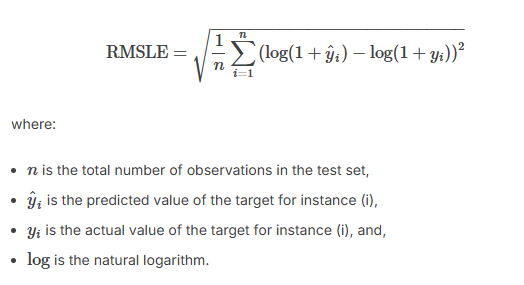

`Purpose:`
Pelacakan ini dilakukan untuk mengetahui seberapa besar kalori yang dibakar seseorang dari variabel yang ada. Pelacakan ini dapat menjadi salah satu contoh penerapan machine learning pada kasus dunia nyata seperti smartwatch, fitness tracker, dan lain-lain.

`Dataset:`
Calories Burnt Prediction - ruchikakumbhar (train, test, sample_submission)

# Load Data

In [1]:
# Import Library
import pandas as pd

In [2]:
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [4]:
df.duplicated().sum()

0

Observasi:
- Terdapat 7,500,000 data tanpa nilai NaN dan duplikat.
- Terdapat 8 kolom tipe data numerik dan 1 kolom tipe data kategorikal. Hal yang akan perlu dilakukan adalah melakukan standarsdisasi pada numerikal nanti agar nilai tinggi tidak menjadi noise. Kemudian, one hot encoding akan diterapkan pada kolom kategorikal, karena hanya merepresentasikan 2 gender tanpa tingkatan/urutan yang berarti.

# Exploratory Data Analysis

Apa yang akan dilakukan:
- Data Understanding
    - Drop Kolom `id`
    - Cek Distribusi Kolom Numerikal
- Feature Engineering
    - Map sex 'm' = 0, 'f' = 1
    - Ubah Height dari _cm_ ke _m_
    - Hitung BMI pada kolom baru `BMI` dengan rumus:
    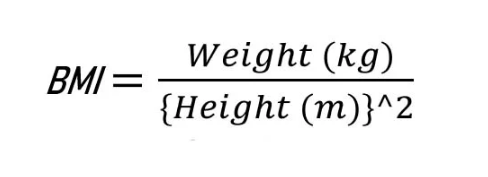
- Visualisasi
    - Visualisasi Kolom Numerikal (Histogram)
    - Matriks Korelasi
    - Pivot Table

## Data Understanding

In [5]:
# Drop Kolom id
df = df.drop(columns=['id'], axis=1)
test = test.drop(columns=['id'], axis=1)

In [6]:
# Ambil Data Numerikal dan Kategorikal
num_data = df.select_dtypes(exclude='object')
cat_data = df.select_dtypes(include='object')

In [7]:
num_data.columns

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

In [8]:
cat_data.columns

Index(['Sex'], dtype='object')

Pada keluaran di atas dapat dilihat bahwa, hanya ada 1 kolom kategorikal yaitu `sex`, karena hanya 1 kolom, maka kolom ini akan diubah ke numerikal dengan map

In [9]:
num_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Kolom `duration` dari distribusi data di atas menunjukkan nilai paling besar 30. Menurutku ini artinya metric hitungannya pakai menit. Untuk kolom `Height` kemungkinan menggunakan metrik cm karena nilai paling tingginya 132, gak mungkin ada orang dengan tinggi 132 m ~. Kemudian tidak ada indikasi kolom yang berpotensi menjadi *data leakage* karena semua dihitung selama olahraga berlangsung, bukan setelahnya.

## Feature Engineering

In [10]:
# Map Kolom `Sex`
df['Sex'] = df['Sex'].map({
    'female': 1,
    'male' : 0
})

In [11]:
test['Sex'] = test['Sex'].map({
    'female': 1,
    'male' : 0
})

In [12]:
# Ubah height dari cm ke m
df['Height'] = df['Height']/100
test['Height'] = test['Height']/100
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,36,1.89,82.0,26.0,101.0,41.0,150.0
1,1,64,1.63,60.0,8.0,85.0,39.7,34.0
2,1,51,1.61,64.0,7.0,84.0,39.8,29.0
3,0,20,1.92,90.0,25.0,105.0,40.7,140.0
4,1,38,1.66,61.0,25.0,102.0,40.6,146.0


In [13]:
# Hitung BMI
df['BMI'] = (df['Weight']/((df['Height'])**2)).round(2)
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,0,36,1.89,82.0,26.0,101.0,41.0,150.0,22.96
1,1,64,1.63,60.0,8.0,85.0,39.7,34.0,22.58
2,1,51,1.61,64.0,7.0,84.0,39.8,29.0,24.69
3,0,20,1.92,90.0,25.0,105.0,40.7,140.0,24.41
4,1,38,1.66,61.0,25.0,102.0,40.6,146.0,22.14


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  int64  
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
 8   BMI         750000 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 51.5 MB


Semua kolom sudah menjadi numerikal, oleh sebab itu kita tidak perlu bagi ke kolom numerikal dan kategorikal lagi. 

## Visualisasi

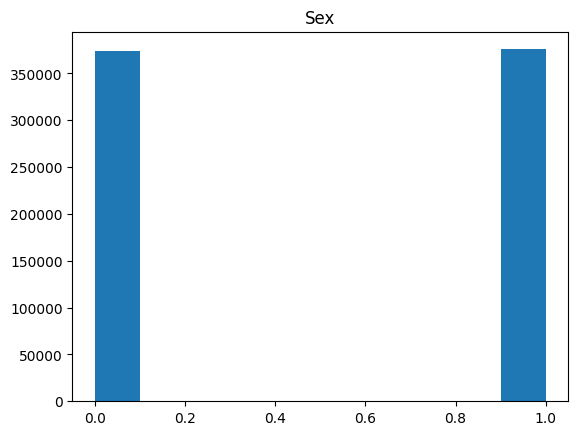

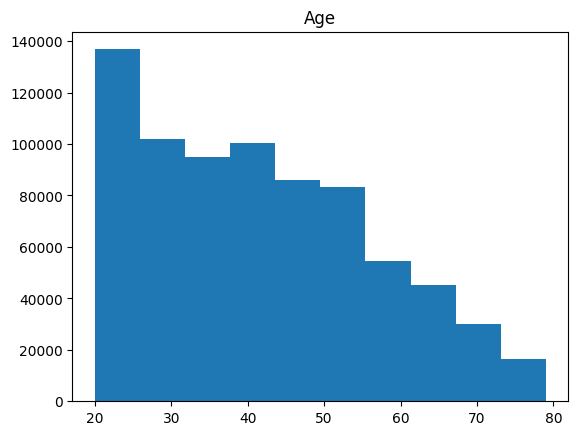

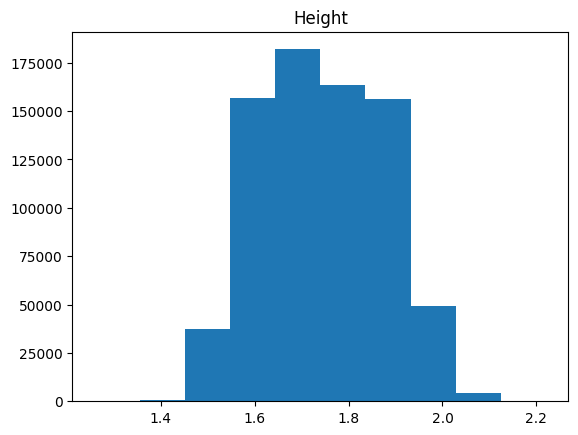

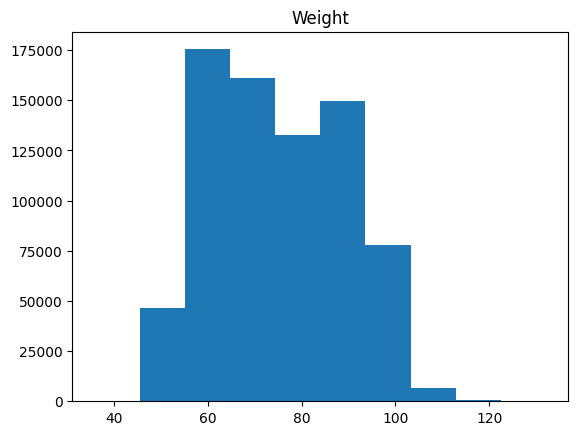

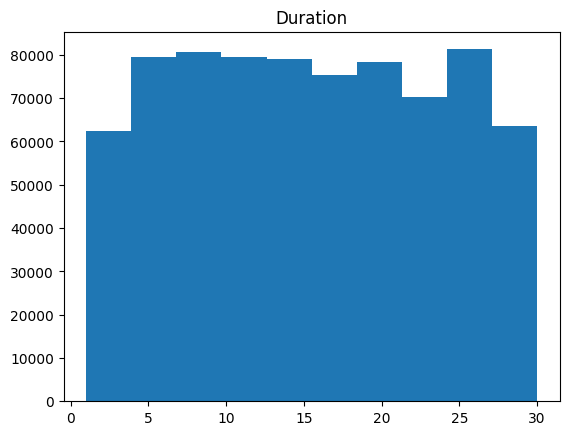

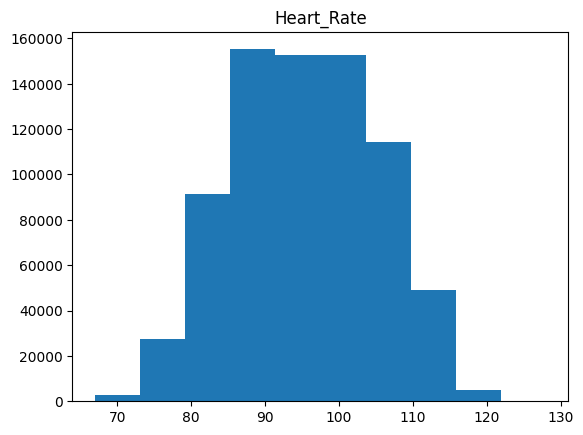

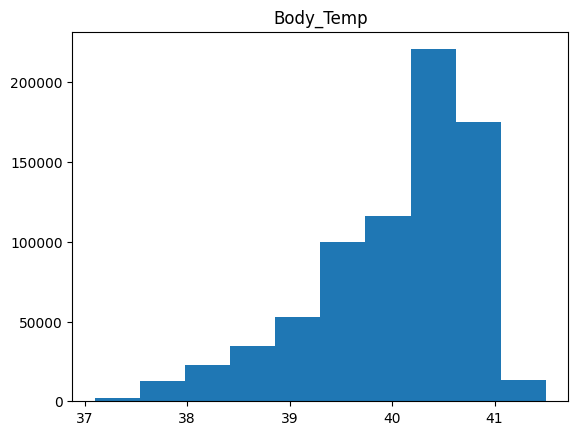

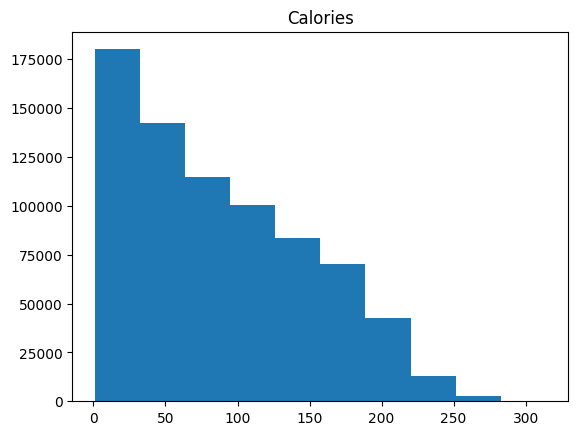

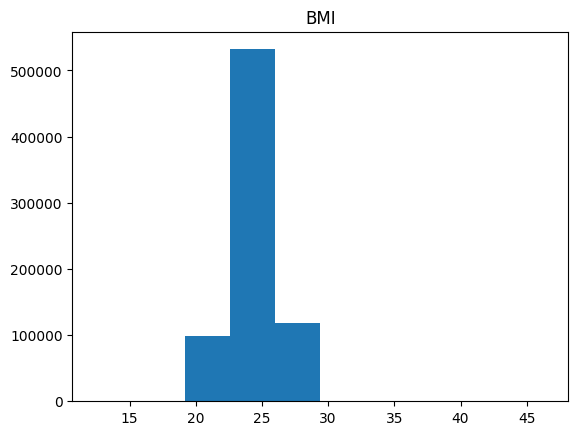

In [15]:
# Histogram 
import matplotlib.pyplot as plt
import seaborn as sns

for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [16]:
# Correlation Matrix
corr = df.corr()
corr

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
Sex,1.000000,-0.009689,-0.755906,-0.818250,0.009594,-0.009122,0.015933,-0.012011,-0.682521
Age,-0.009689,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683,0.192318
Height,-0.755906,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026,0.522588
Weight,-0.818250,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863,0.739686
Duration,0.009594,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908,0.006111
Heart_Rate,-0.009122,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748,0.023449
Body_Temp,0.015933,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671,0.008790
Calories,-0.012011,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000,0.049203
BMI,-0.682521,0.192318,0.522588,0.739686,0.006111,0.023449,0.008790,0.049203,1.000000


Dari heatmap kita dapat melihat bahwa:
1. Korelasi antara `Duration` dan `Calories` sebesar *0.95* yang berarti semakin lama durasi olahraga, maka semakin banyak kalori yang dibakar.
2. Kemudian antara `Heart Rate` dan `Calories` sebesar *0.90* yang artinya semakin tinggi detak jantung, maka kalori yang terbakar pun semakin banyak. 
3. Fitur `BMI` yang kita buat tidak terlalu berkontribusi besar pada dataset ini. Oleh sebab itu akan dihapus.


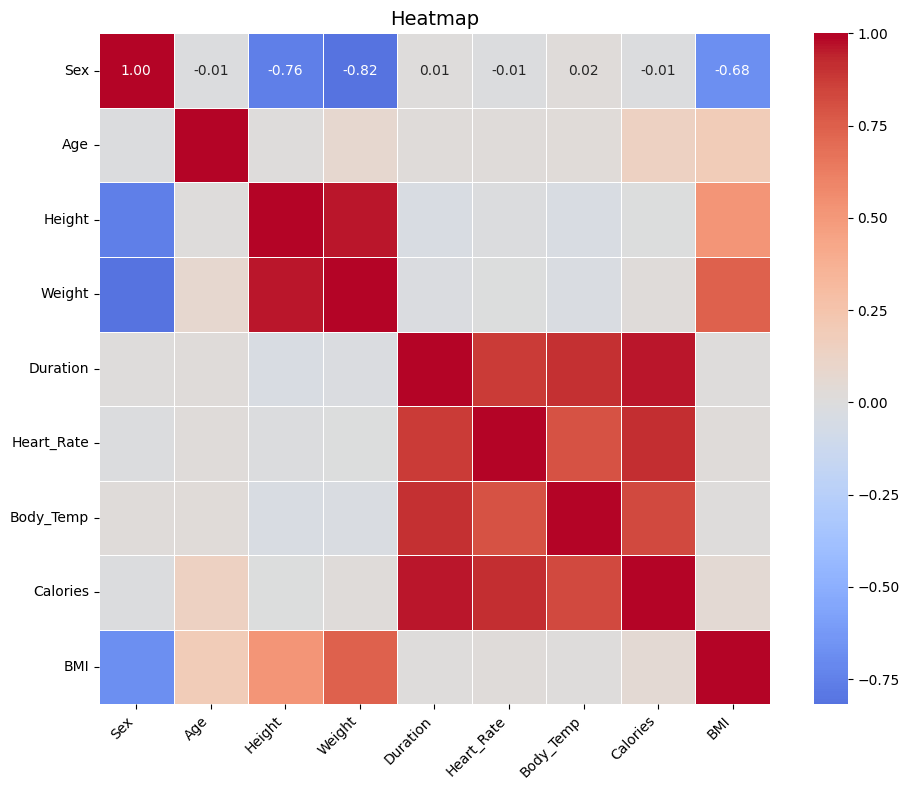

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, square=True)

plt.title("Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
df = df.drop(columns='BMI', axis=1)

# Data Preparation

In [19]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,36,1.89,82.0,26.0,101.0,41.0,150.0
1,1,64,1.63,60.0,8.0,85.0,39.7,34.0
2,1,51,1.61,64.0,7.0,84.0,39.8,29.0
3,0,20,1.92,90.0,25.0,105.0,40.7,140.0
4,1,38,1.66,61.0,25.0,102.0,40.6,146.0


In [20]:
test.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,45,1.77,81.0,7.0,87.0,39.8
1,0,26,2.00,97.0,20.0,101.0,40.5
2,1,29,1.88,85.0,16.0,102.0,40.4
3,1,39,1.72,73.0,20.0,107.0,40.6
4,1,30,1.73,67.0,16.0,94.0,40.5


In [21]:
X_train = df.drop(['Calories'], axis=1)
X_test = test
y = df['Calories']

In [22]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Modelling

In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np

In [24]:
xgb_model = XGBRegressor(
    subsample=1.0,
    reg_lambda=5,
    reg_alpha=0.01,
    n_estimators=1000,
    max_depth=9,
    learning_rate=0.03,
    gamma=0,
    colsample_bytree=0.9,
    random_state=42
)

In [25]:
xgb_model.fit(X_tr, y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [26]:
y_pred_val = xgb_model.predict(X_val)
y_pred_val = np.maximum(0, y_pred_val)

In [27]:
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred_val))
print(f"✅ RMSLE: {rmsle:.4f}")

✅ RMSLE: 0.0603


In [ ]:
y_pred = xgb_model.predict(X_test)

In [31]:
test = pd.read_csv('dataset/test.csv')

submission = pd.DataFrame({
    "id": test["id"],
    "Calories": y_pred 
})

submission.to_csv("dataset/submission_xgb_regression.csv", index=False)